Anushko Chattopadhyay(M24PH1001)

The Deutsch and Deutsch--Jozsa algorithms represent foundational milestones in quantum computation, demonstrating how quantum parallelism and interference enable exponential advantages over classical deterministic methods. The Deutsch algorithm addresses the simplest nontrivial scenario: determining whether a single-bit Boolean function is constant or balanced using only one oracle query, compared to two evaluations required classically. The Deutsch--Jozsa algorithm generalizes this idea to an $n$-bit Boolean function, distinguishing between constant and balanced functions with a single quantum query, whereas a classical approach requires up to $2^{\,n-1}+1$ evaluations in the worst case. These algorithms highlight the power of superposition, entanglement, and Hadamard transformations in extracting global information about a function.

In this project, both algorithms are implemented and simulated using the Qiskit framework and the AerSimulator backend. Programmable constant and balanced oracles are constructed, and a randomized oracle selection enables dynamic testing of both problem types. The Deutsch implementation demonstrates the one-qubit version of the problem, while the Deutsch--Jozsa extension allows user-defined input size for the general $n$ (here $n$=5) qubit case. After circuit optimization via Qiskit's preset pass managers, the circuits are executed on the simulator and analyzed through measurement statistics and histogram plots. The results align with theoretical predictions: constant oracles yield all-zero measurement outcomes, whereas balanced oracles produce output strings containing at least one "1". This integrated coding framework verifies the correctness of both algorithms and illustrates how modern quantum programming tools enable practical experimentation with fundamental quantum speedups.


Chosen oracle: Constant


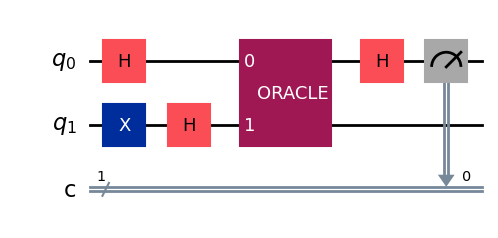

In [1]:
#Deustch Algorithm
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

#Defining Functions

def oracle_constant_0():
    qc = QuantumCircuit(2)
    return qc

def oracle_constant_1():
    qc = QuantumCircuit(2)
    qc.x(1)
    return qc

def oracle_balanced_identity():
    qc = QuantumCircuit(2)
    qc.cx(0, 1)
    return qc

def oracle_balanced_not():
    qc = QuantumCircuit(2)
    qc.x(0)
    qc.cx(0, 1)
    return qc

oracles = {
    "Constant": oracle_constant_0,
    "constant": oracle_constant_1,
    "Balanced": oracle_balanced_identity,
    "Balanced": oracle_balanced_not,
}

#Random Selection of Function

chosen_name = random.choice(list(oracles.keys()))
chosen_oracle_circuit = oracles[chosen_name]()
print("Chosen oracle:", chosen_name)

oracle_gate = chosen_oracle_circuit.to_gate(label="ORACLE")

#Main Circuit

qr = QuantumRegister(2, "q")
cr = ClassicalRegister(1, "c")
qc = QuantumCircuit(qr, cr)

qc.x(1)
qc.h([0, 1])
qc.append(oracle_gate, [0, 1])
qc.h(0)
qc.measure(0,0)

#Drawing the circuit

qc.draw("mpl")  

In [2]:
#backend
backend = AerSimulator()

#Getting Counts
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
tcirc = transpile(isa_circuit, backend)
job = backend.run(tcirc, shots=1024)
result = job.result().get_counts()
print(result)


{'0': 1024}


In [3]:
#Finding whether the function is constant or balanced
if "0" in result:
    print("The Function is Constant")
else:
    print("The Function is Balanced")

The Function is Constant


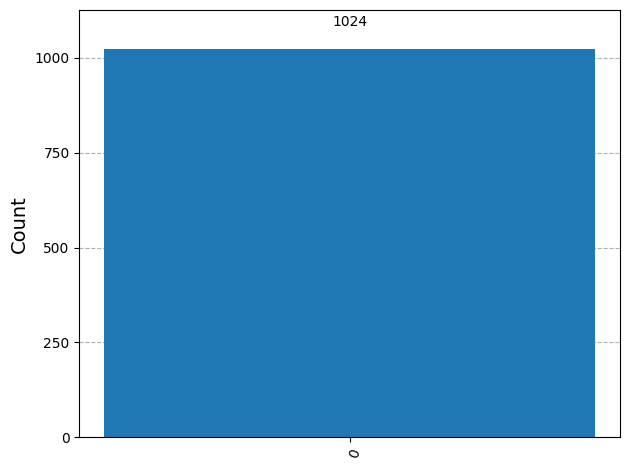

In [ ]:
#Plotting the counts
plot_histogram(result)

Chosen oracle: Balanced


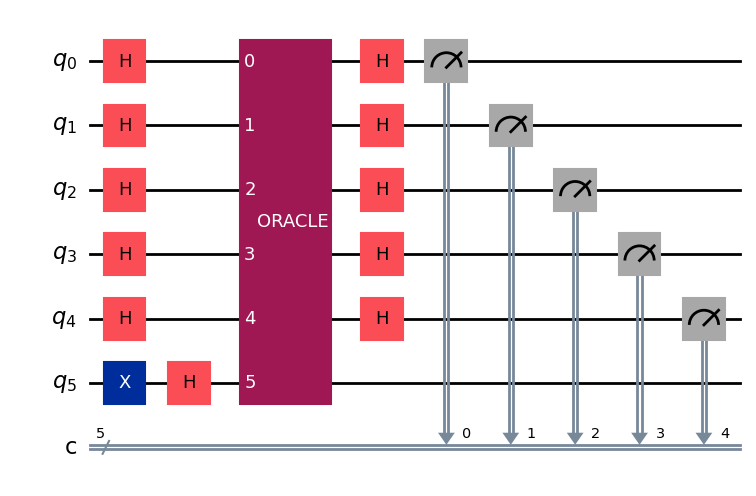

In [5]:
#Deutsch-Jozsa Algorithm

#No. of Qubits

n=5

#Defining Functions

def constant_oracle(value, n):
    qc = QuantumCircuit(n + 1)
    if value == 1:
        qc.x(n) 
    return qc
def balanced_oracle(n):
    qc = QuantumCircuit(n + 1)
    s = [random.choice([0, 1]) for _ in range(n)]

    for i, bit in enumerate(s):
        if bit == 1:
            qc.cx(i, n)
    return qc
oracle_type = random.choice(["Constant", "Balanced"])
print("Chosen oracle:", oracle_type)

if oracle_type == "Constant":
    val = random.choice([0, 1])
    oracle = constant_oracle(val, n)
else:
    oracle = balanced_oracle(n)
oracle_gate = oracle.to_gate(label="ORACLE")

#Creating the Circuit

qr = QuantumRegister(n + 1, "q")
cr = ClassicalRegister(n, "c")
qc = QuantumCircuit(qr, cr)
qc.x(n)
qc.h(range(n + 1))
qc.append(oracle_gate, range(n + 1))
qc.h(range(n))
qc.measure(range(n), range(n))

#Drawing the Circuit

qc.draw('mpl')

In [6]:
#backend

backend = AerSimulator()

#getting counts

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

tcirc = transpile(isa_circuit, backend)
job = backend.run(tcirc, shots=1024)
results = job.result().get_counts()
print( results)


{'10111': 1024}


In [ ]:
#finding whether the function is constant or balanced

if "0" * n in results:
    print("The Function is Constant")
else:
    print("The Function is Balanced")

The Function is Balanced


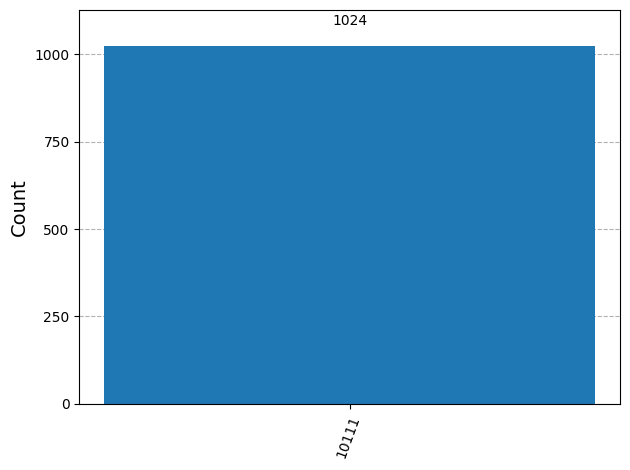

In [ ]:
#Plotting the counts
plot_histogram(results)